In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [5]:
train.shape

(54808, 13)

In [6]:
test.shape

(23490, 12)

In [7]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [8]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [9]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [10]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [11]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
train.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [13]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [14]:
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


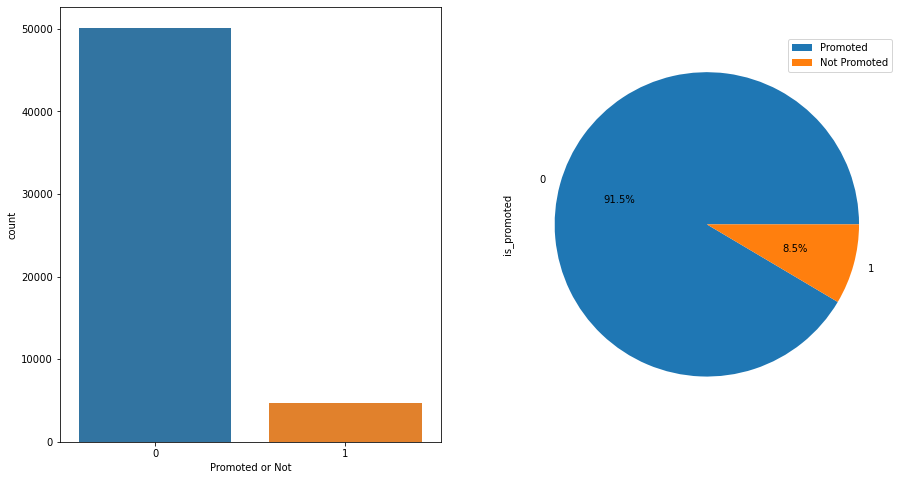

In [15]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1) # row,no_of_graphs,graphno.
sns.countplot(x='is_promoted',data=train)
plt.xlabel('Promoted or Not')

plt.subplot(1,2,2)
train['is_promoted'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['Promoted','Not Promoted'])
plt.show()

In [16]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
#percentage of missing train data
train.isnull().sum()/train.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [18]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [19]:
# percentage of missing test data
test.isnull().sum()/test.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [20]:
# filling missing data with mode
train['education']=train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

test['education']=test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])



In [21]:
train.isnull().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [22]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

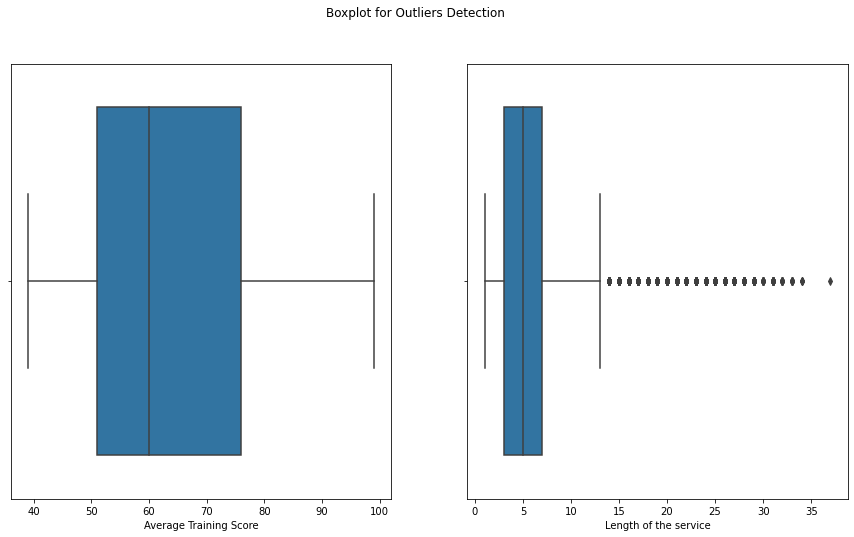

In [23]:
# outliers handling

plt.subplot(1,2,1)
sns.boxplot(x='avg_training_score', data=train)
plt.xlabel('Average Training Score')

plt.subplot(1,2,2)
sns.boxplot(x='length_of_service', data=train)
plt.xlabel('Length of the service')
plt.suptitle('Boxplot for Outliers Detection')
plt.show()

In [24]:
# removing outliers from length_of_service
train = train[train['length_of_service']<13]

Text(0.5, 1.0, 'Awards Won')

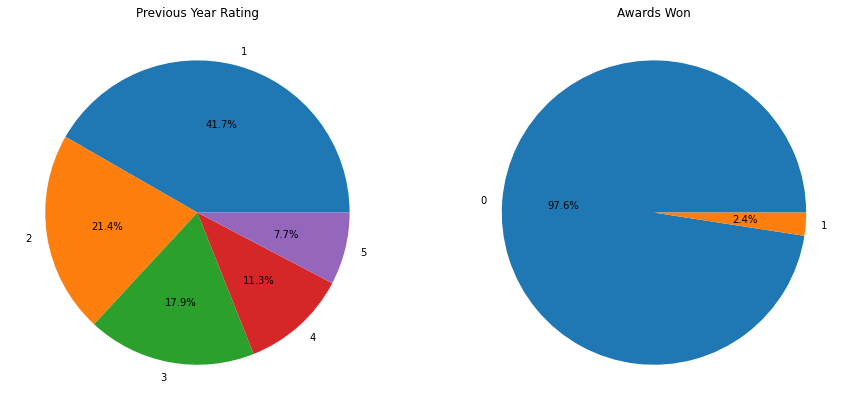

In [25]:
plt.subplot(1,2,1)
labels = ['0','1']
size = train['previous_year_rating'].value_counts()
labels = ['1','2','3','4','5']
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Previous Year Rating')

plt.subplot(1,2,2)
labels=['0','1']
size = train['awards_won?'].value_counts()

plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Awards Won')


In [26]:
train['no_of_trainings'].value_counts()

1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: no_of_trainings, dtype: int64

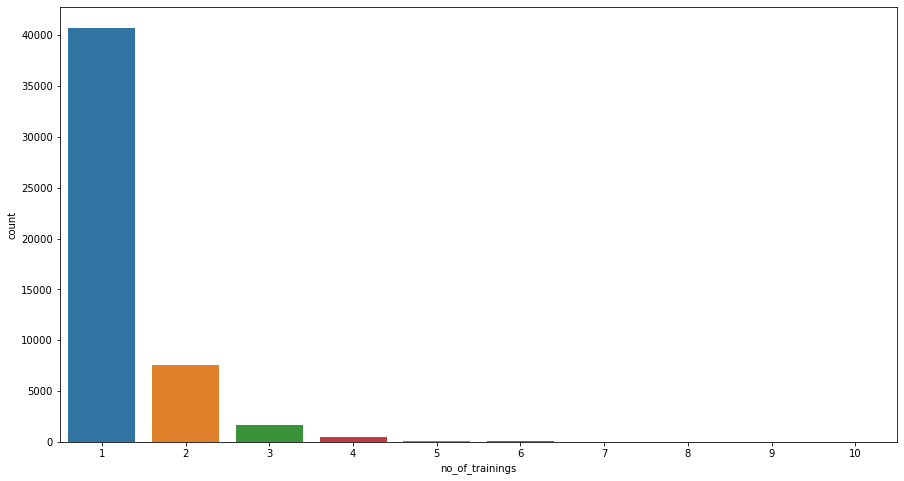

In [27]:
# plot no_of_trainings
sns.countplot(x='no_of_trainings',data=train)
plt.show()
 

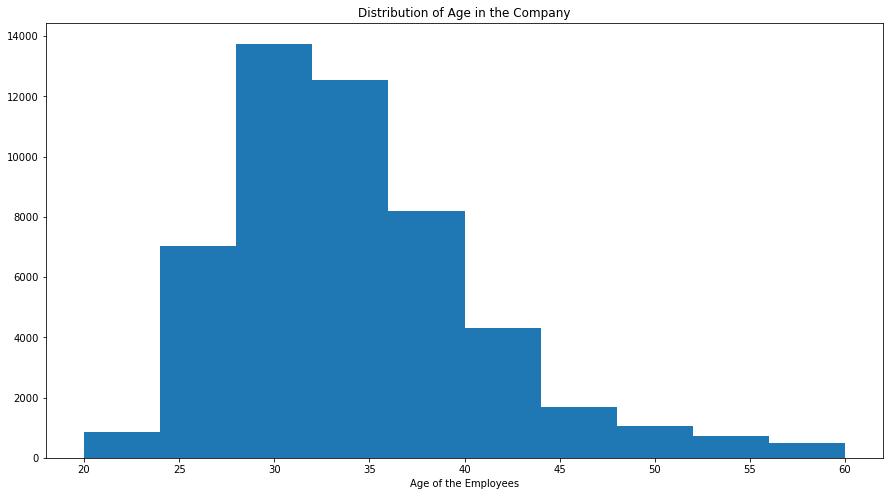

In [28]:
plt.hist(train['age'])
plt.xlabel('Age of the Employees')
plt.title('Distribution of Age in the Company')
plt.show()

In [29]:
train['department'].value_counts()

Sales & Marketing    15519
Operations           10297
Technology            6520
Procurement           6463
Analytics             5187
Finance               2447
HR                    2226
Legal                  988
R&D                    985
Name: department, dtype: int64

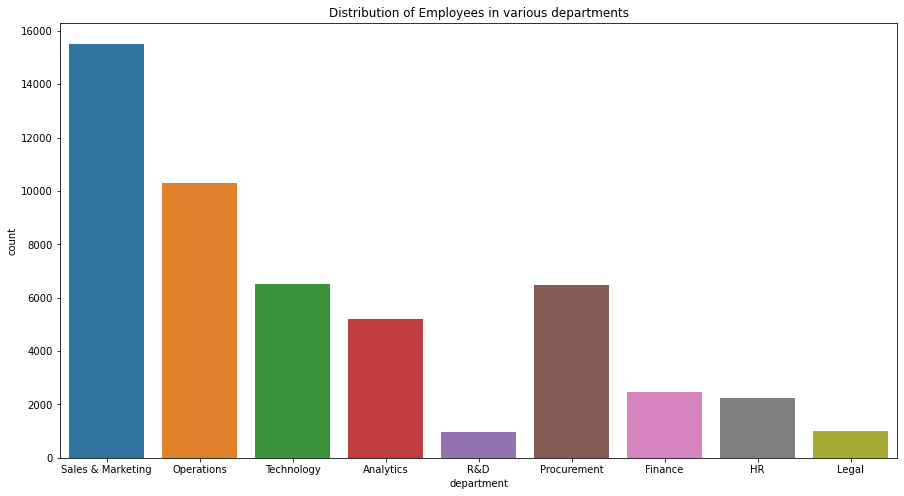

In [30]:
sns.countplot(x='department',data=train)
plt.title('Distribution of Employees in various departments')
plt.show()


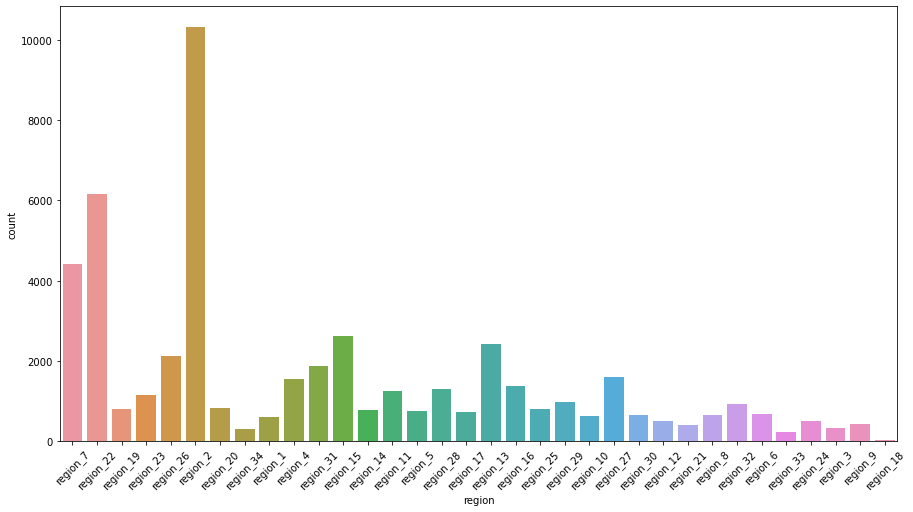

In [31]:
sns.countplot(x='region',data=train)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Recruitment Channel')

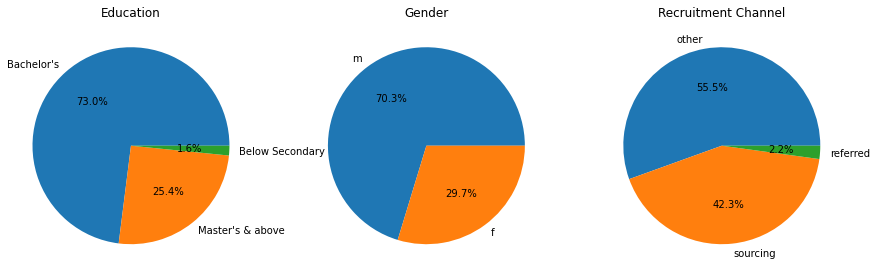

In [32]:
plt.subplot(1,3,1)
size = train['education'].value_counts()
labels = train['education'].value_counts().index
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Education')

plt.subplot(1,3,2)
size = train['gender'].value_counts()
labels = train['gender'].value_counts().index
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Gender')

plt.subplot(1,3,3)
size = train['recruitment_channel'].value_counts()
labels = train['recruitment_channel'].value_counts().index
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Recruitment Channel')

Text(0.5, 1.0, 'Effect of gender on promotion')

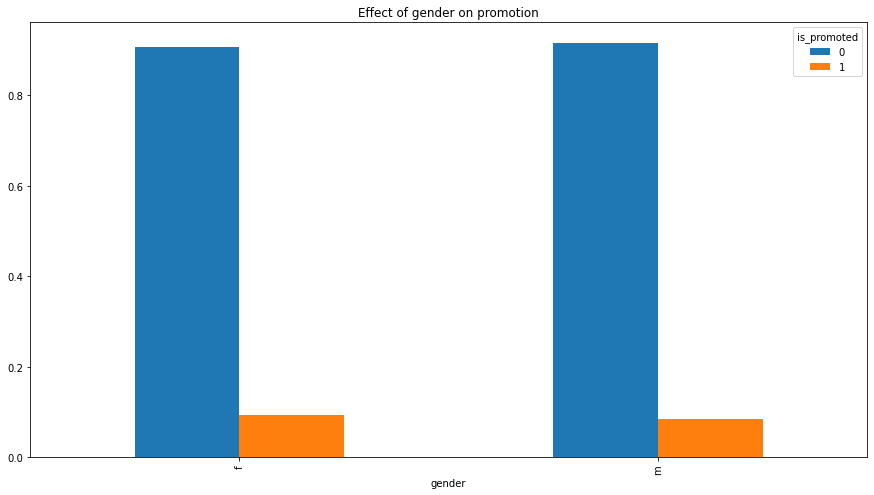

In [33]:
# bivariate analysis
# gender and promotion

x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False) #division
plt.title('Effect of gender on promotion')

Text(0.5, 1.0, 'Effect of department on promotion')

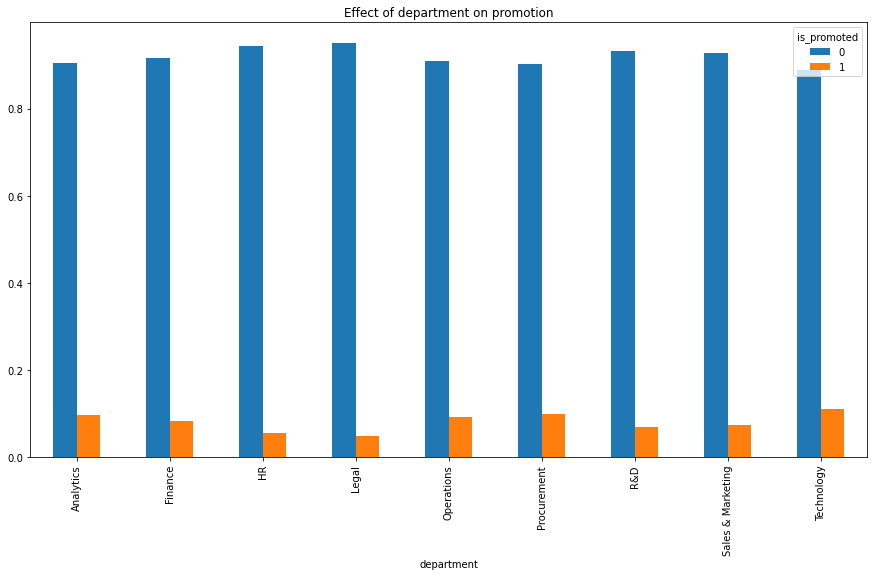

In [34]:
# department and promotion
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False) 
plt.title('Effect of department on promotion')

Text(0.5, 1.0, 'Effect of age on promotion')

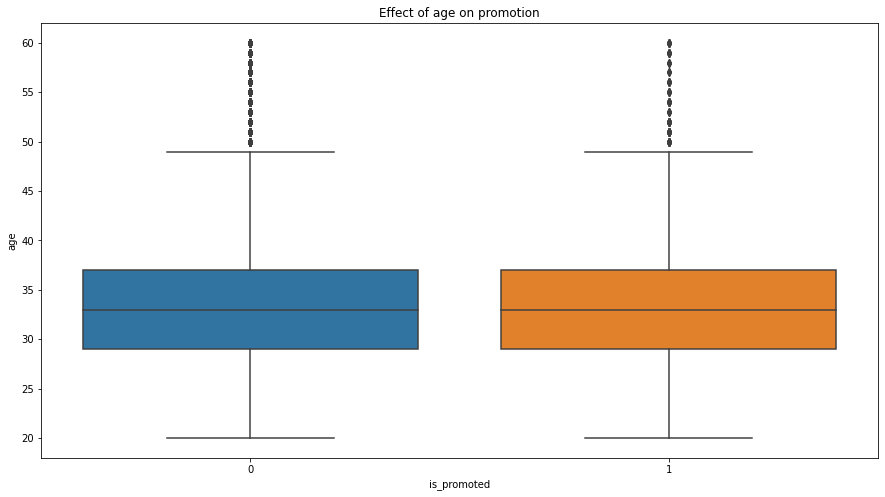

In [35]:
# age and promotion
sns.boxplot(x='is_promoted', y='age', data=train)
plt.title('Effect of age on promotion')


In [36]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


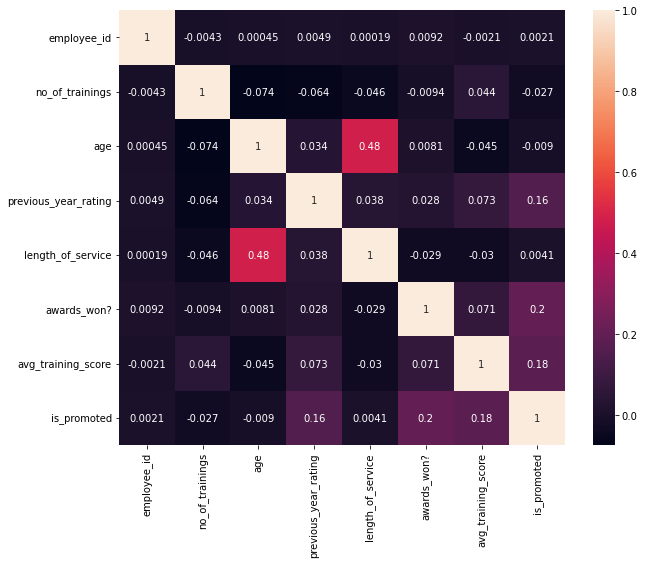

In [37]:
# multivariate analysis
# plot heatmap of train correlation excluding object columns
plt.figure(figsize=(10,8))
sns.heatmap(train.drop(['department','region','education','gender','recruitment_channel'],axis=1).corr(),annot=True)
plt.show()


In [38]:
# remove useless columns
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [39]:
train = train.drop(['employee_id', 'region', 'recruitment_channel'], axis=1)
test = test.drop(['employee_id', 'region', 'recruitment_channel'], axis=1)


In [40]:
train.select_dtypes('object')

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m
...,...,...,...
54802,Sales & Marketing,Bachelor's,m
54804,Operations,Master's & above,f
54805,Analytics,Bachelor's,m
54806,Sales & Marketing,Bachelor's,m


In [41]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# fit and transform
train['department'] = le.fit_transform(train['department'])
train['education'] = le.fit_transform(train['education'])
train['gender'] = le.fit_transform(train['gender'])

test['department'] = le.fit_transform(test['department'])
test['education'] = le.fit_transform(test['education'])
test['gender'] = le.fit_transform(test['gender'])



In [42]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,2,0,1,35,5.0,8,0,49,0
1,4,0,1,1,30,5.0,4,0,60,0
2,7,0,1,1,34,3.0,7,0,50,0
3,7,0,1,2,39,1.0,10,0,50,0
4,8,0,1,1,45,3.0,2,0,73,0


In [43]:
train['department'].value_counts()
# Sales & Marketing    16840
# Operations           11348
# Technology            7138
# Procurement           7138
# Analytics             5352
# Finance               2536
# HR                    2418
# Legal                 1039
# R&D                    999

7    15519
4    10297
8     6520
5     6463
0     5187
1     2447
2     2226
3      988
6      985
Name: department, dtype: int64

In [44]:
train['education'].value_counts()
# education
# Bachelor's          36669
# Master's & above    14925
# Below Secondary       805
# Name: count, dtype: int64


0    36965
2    12862
1      805
Name: education, dtype: int64

In [45]:
train['gender'].value_counts()

1    35592
0    15040
Name: gender, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)




In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8926631776439222
[[8694  550]
 [ 537  346]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9244
           1       0.39      0.39      0.39       883

    accuracy                           0.89     10127
   macro avg       0.66      0.67      0.67     10127
weighted avg       0.89      0.89      0.89     10127



<AxesSubplot:>

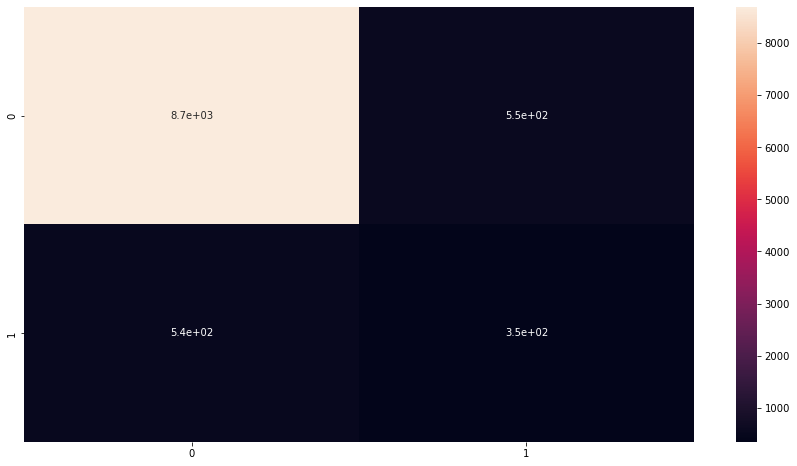

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [51]:
import pickle

filename = 'emp_retention_model.sav'
# save model
pickle.dump(dt, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [52]:
X.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,7,2,0,1,35,5.0,8,0,49
1,4,0,1,1,30,5.0,4,0,60
2,7,0,1,1,34,3.0,7,0,50
3,7,0,1,2,39,1.0,10,0,50
4,8,0,1,1,45,3.0,2,0,73


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [54]:
X['no_of_trainings'].value_counts()

1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: no_of_trainings, dtype: int64

In [55]:
train.describe()


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,50632.000000,50632.000000,50632.000000,50632.000000,50632.00000,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000
mean,4.938952,0.523957,0.702955,1.259875,33.67645,3.304491,4.958090,0.024431,63.496563,0.086507
std,2.532256,0.870344,0.456961,0.615524,6.64494,1.213063,2.773408,0.154385,13.449606,0.281113
min,0.000000,0.000000,0.000000,1.000000,20.00000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,4.000000,0.000000,0.000000,1.000000,29.00000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,5.000000,0.000000,1.000000,1.000000,33.00000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,7.000000,2.000000,1.000000,1.000000,37.00000,4.000000,7.000000,0.000000,76.000000,0.000000
max,8.000000,2.000000,1.000000,10.000000,60.00000,5.000000,12.000000,1.000000,99.000000,1.000000
